# Employee Performance Prediction Using HR Data

Human resources (HR) data contains valuable insights into employee performance, work habits, and retention patterns. In this challenge, you are tasked with developing a predictive model that can forecast future employee performance or retention based on historical HR data, such as performance reviews, work hours, and other relevant employee metrics.


In [6]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

In [8]:
# Plotting setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -------------------- Load Dataset from GitHub --------------------

url = "https://raw.githubusercontent.com/KammariSadguruSai/EmployeePerformancePrediction/main/employee_attrition_and_engagement.csv"
response = requests.get(url)
data = StringIO(response.text)

df = pd.read_csv(data)

# PART A: Data Exploration & Cleaning 

In [10]:

# Basic Information
print("🔍 Dataset Info:")
print(df.info())
print("\n📌 First 5 Rows:")
print(df.head())

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel

In [12]:
# Missing Values
print("\n❗ Missing Values:")
print(df.isnull().sum())



❗ Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole   

In [14]:

# Statistical Summary
print("\n📊 Numerical Summary:")
print(df.describe())



📊 Numerical Summary:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

In [16]:

# Categorical Summary
print("\n🧩 Categorical Summary:")
print(df.describe(include=['object']))




🧩 Categorical Summary:
       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  


In [18]:
# Value counts for target-like features
print("\n🎯 Attrition Distribution:")
print(df['Attrition'].value_counts())




🎯 Attrition Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [29]:
# Confirm final structure
print("\n✅ Data Types After Cleaning:")
print(df.dtypes)


✅ Data Types After Cleaning:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance          

#  PART B: Visualizations & Insights

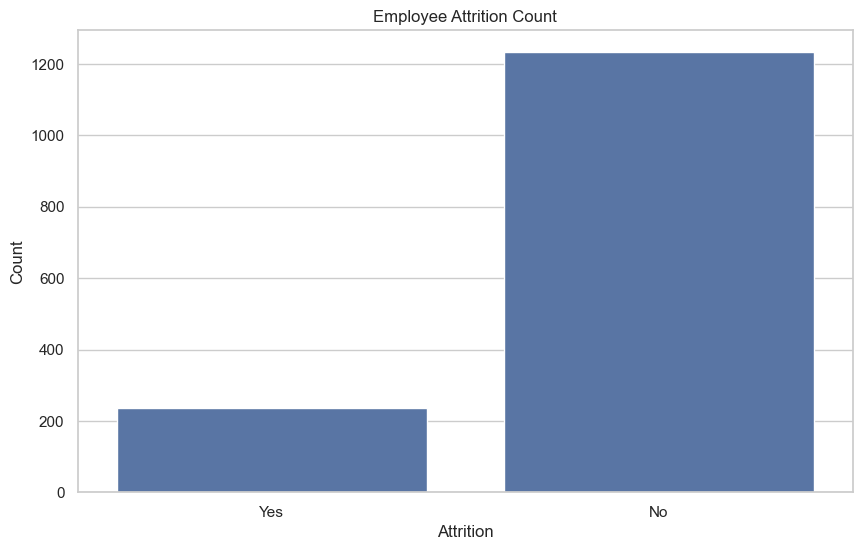

In [31]:
# Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title("Employee Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

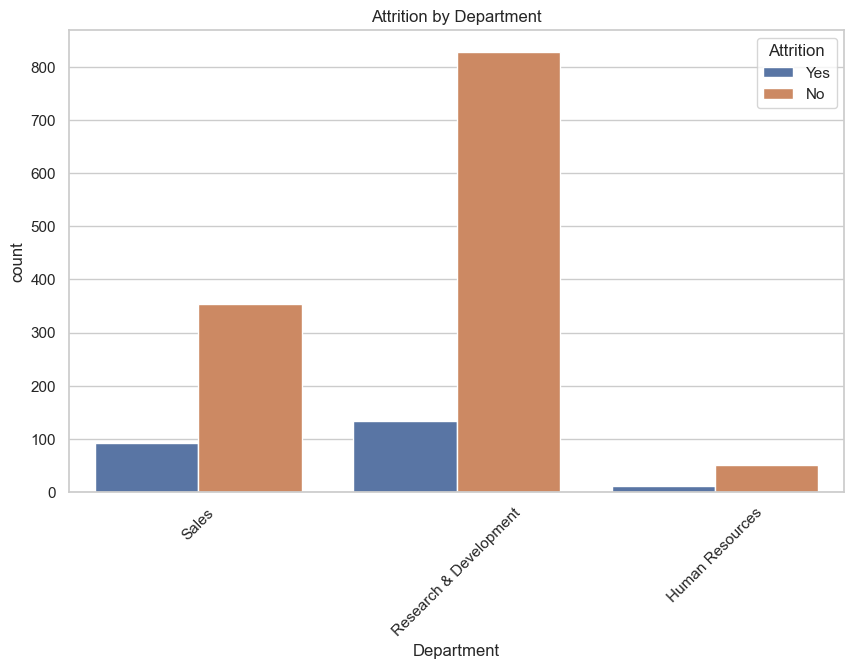

In [33]:
# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

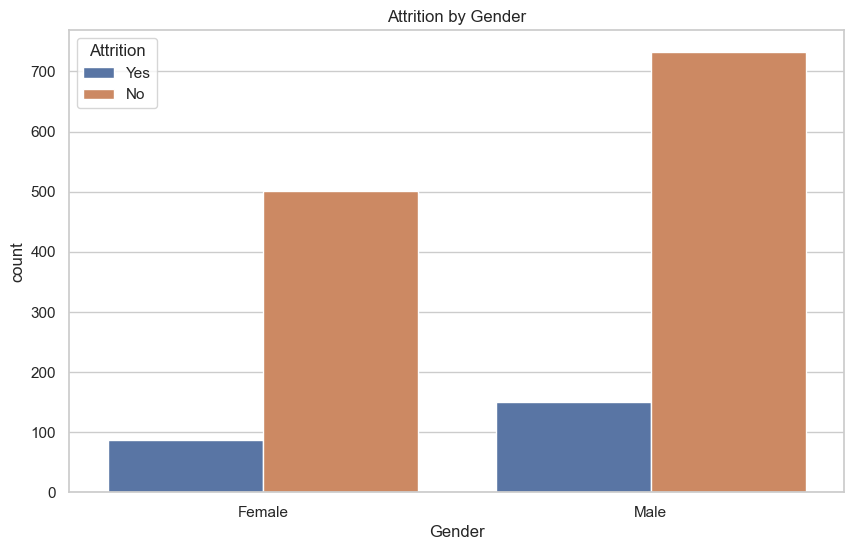

In [35]:
# Gender Distribution vs Attrition
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title("Attrition by Gender")
plt.show()

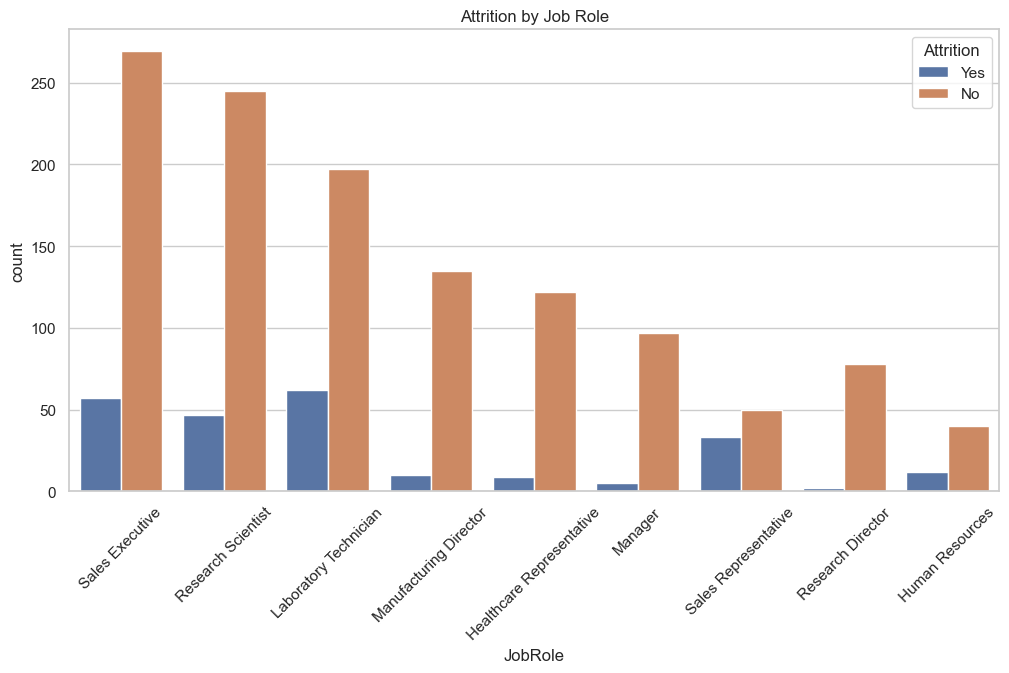

In [37]:
# Attrition by Job Role
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

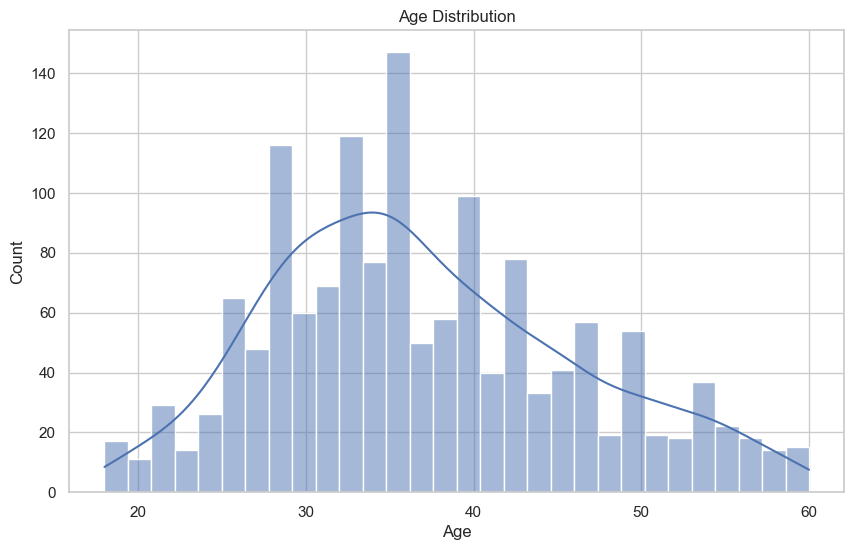

In [39]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

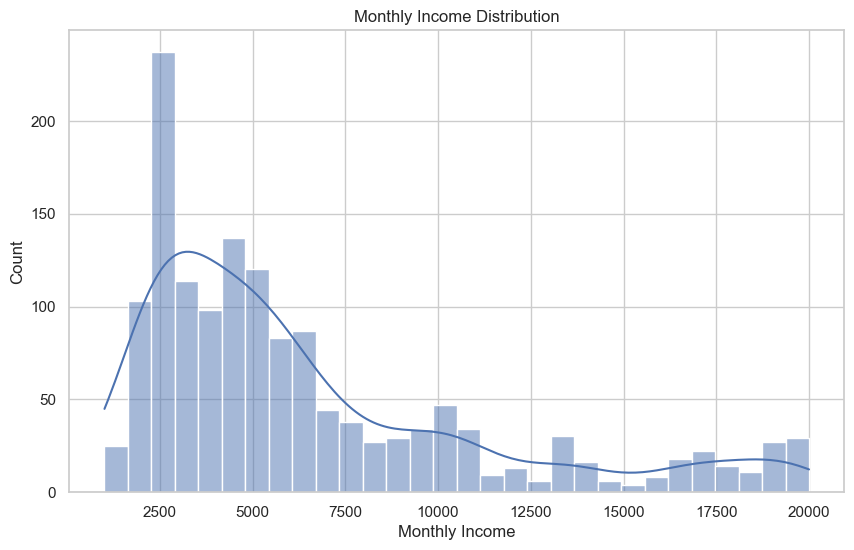

In [41]:
# Monthly Income Distribution
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

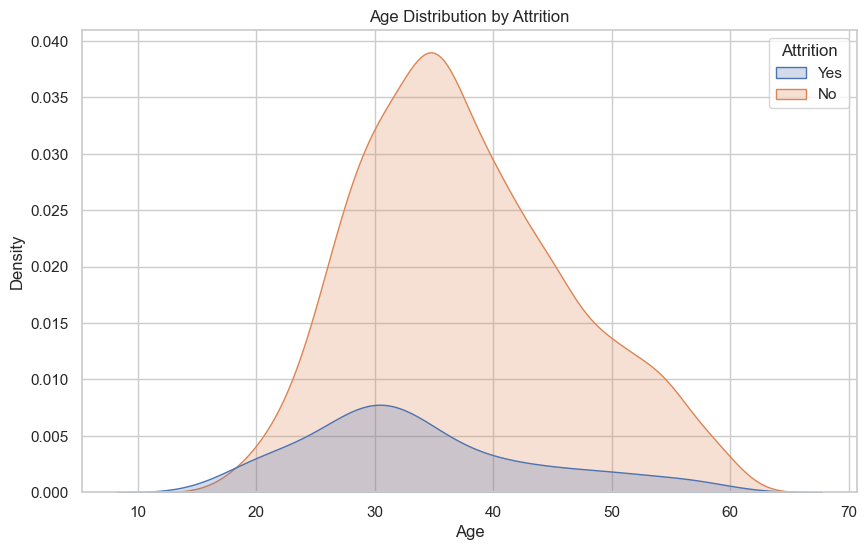

In [43]:
# Age by Attrition (Density Plot)
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True)
plt.title("Age Distribution by Attrition")
plt.show()

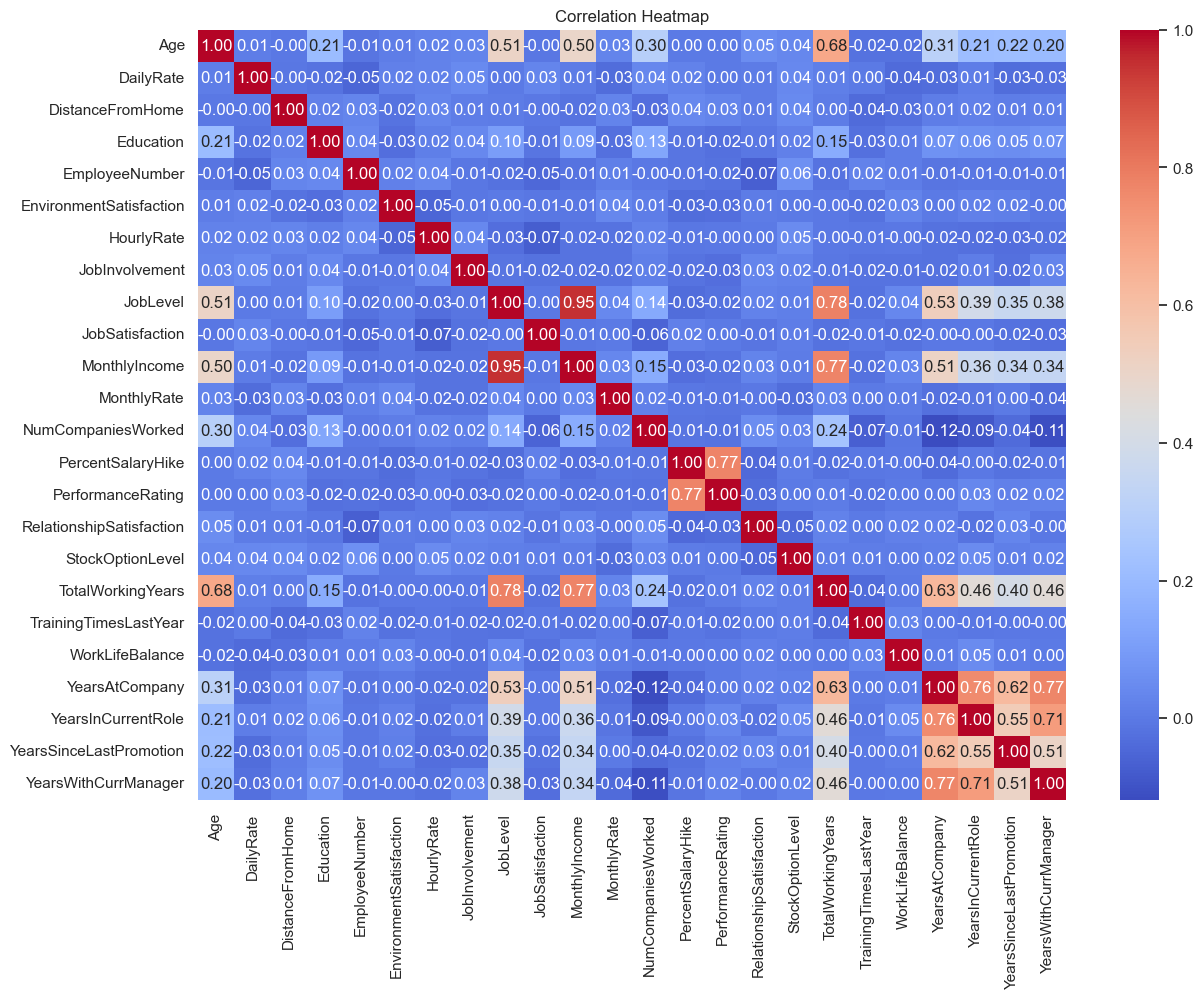

In [45]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

🔍 **Summary of the Correlation Heatmap**

---

### Purpose:
To display the pairwise correlation coefficients between numeric variables in the dataset, helping identify linear relationships.

---

### 📌 Key Observations:

#### **Strong Positive Correlations (Close to +1):**
- **JobLevel** and **MonthlyIncome**: `0.95`  
  → Higher job level strongly correlates with higher monthly income.

- **TotalWorkingYears** and **MonthlyIncome**: `0.78`  
  → More experience usually leads to higher income.

- **YearsAtCompany**, **YearsInCurrentRole**, **YearsWithCurrManager**: `~0.7+`  
  → Logical, as longer tenure often means more time in the same role or under the same manager.

---

#### **Moderate Correlations:**
- **Age** and **TotalWorkingYears**: `0.68`  
  → Older employees tend to have more work experience.

- **JobLevel** and **TotalWorkingYears**: `0.78`

- **PercentSalaryHike** and **PerformanceRating**: `0.77`  
  → Suggests salary hikes may be performance-driven.

---

#### **Weak/Negligible Correlations (Close to 0):**
- **DistanceFromHome**, **DailyRate**, **HourlyRate**, etc. show minimal correlation with other variables.

- Variables like **EmployeeNumber** (ID-like), **StandardHours**, and **OverTime**  
  typically show low correlation but might still be useful in classification tasks.

---
